# Analisi Esplorativa - Dataset Edge-IIoT

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Caricamento del dataset
df = pd.read_csv('EdgeIIoT-dataset.csv')

# Colonne numeriche e categoriche
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Dimensioni del dataset: {df.shape}")
print(f"\nColonne: {list(df.columns)}")
print("------------------------------------------------------------------")

print("\nPrime righe del dataset:")
df.head(10)

Dimensioni del dataset: (2219201, 63)

Colonne: ['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4', 'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum', 'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused', 'http.file_data', 'http.content_length', 'http.request.uri.query', 'http.request.method', 'http.referer', 'http.request.full_uri', 'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options', 'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msg', 'mqtt.msgty

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal
5,2021 11:44:10.166159000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
6,2021 11:44:10.166968000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
7,2021 11:44:10.167072000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
8,2021 11:44:10.169612000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
9,2021 11:44:10.169644000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal


## 2. Tipi di Dato e Valori Mancanti

In [66]:
df.info()

missing = df.isnull().sum()
missing_total = missing.sum()
print(f"\nValori mancanti totali: {missing_total}")
if missing_total > 0:
    print(missing[missing > 0])
else:
    print("Nessun valore mancante nel dataset.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219201 entries, 0 to 2219200
Data columns (total 63 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   frame.time                 object 
 1   ip.src_host                object 
 2   ip.dst_host                object 
 3   arp.dst.proto_ipv4         object 
 4   arp.opcode                 float64
 5   arp.hw.size                float64
 6   arp.src.proto_ipv4         object 
 7   icmp.checksum              float64
 8   icmp.seq_le                float64
 9   icmp.transmit_timestamp    float64
 10  icmp.unused                float64
 11  http.file_data             object 
 12  http.content_length        float64
 13  http.request.uri.query     object 
 14  http.request.method        object 
 15  http.referer               object 
 16  http.request.full_uri      object 
 17  http.request.version       object 
 18  http.response              float64
 19  http.tls_port              float64
 20  tc

## 3. Feature raggruppate per Protocollo di Rete

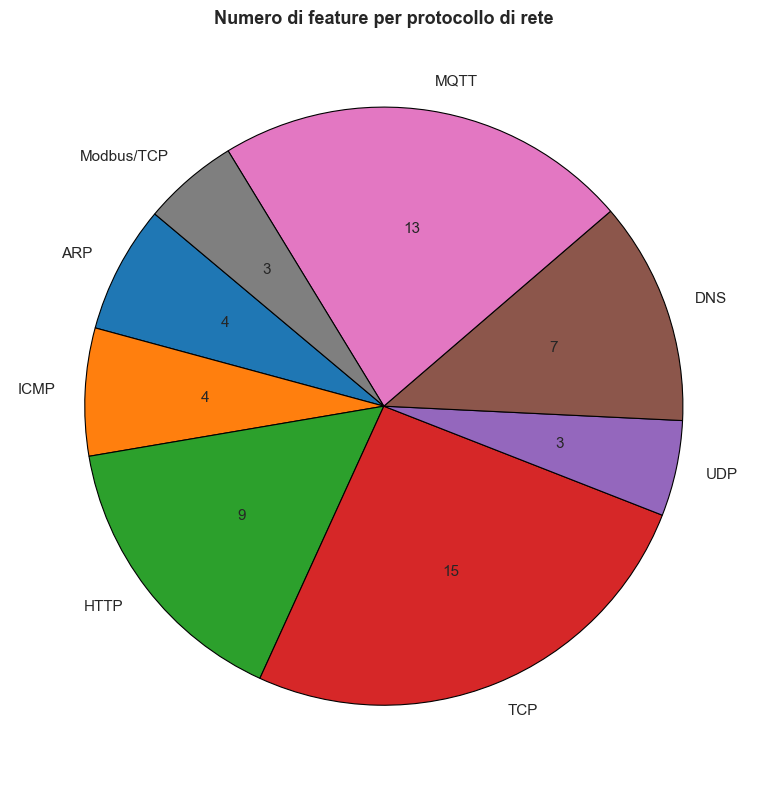

In [67]:
# Feature per protocollo di rete
labels = ['ARP', 'ICMP', 'HTTP', 'TCP', 'UDP', 'DNS', 'MQTT', 'Modbus/TCP']
prefixes = ['arp.', 'icmp.', 'http.', 'tcp.', 'udp.', 'dns.', 'mqtt.', 'mbtcp.']
counts = [sum(c.startswith(p) for c in df.columns) for p in prefixes]

plt.figure(figsize=(10, 8))
plt.pie(counts, labels=labels,
        autopct=lambda pct: f"{int(round(pct / 100 * sum(counts)))}",
        startangle=140, textprops={'fontsize': 11},
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.8})
plt.title('Numero di feature per protocollo di rete', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Distribuzione delle Classi (Attack_label)

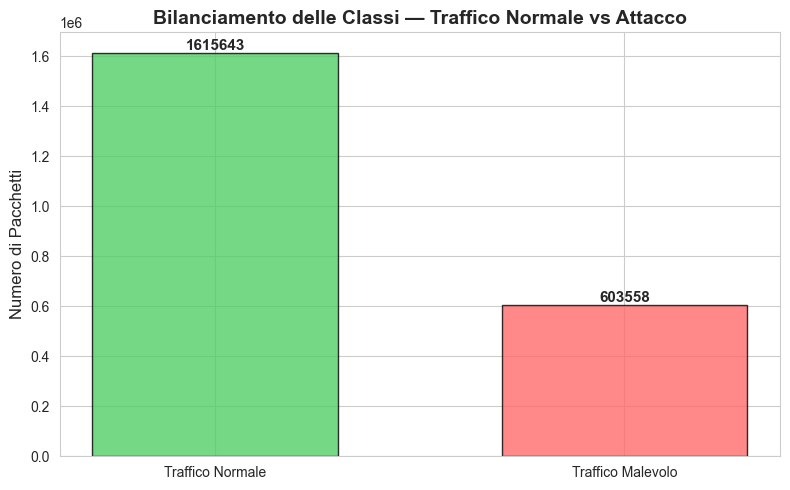

In [ ]:
target_counts = df['Attack_label'].value_counts().sort_index()
labels = ['Traffico Normale', 'Traffico Malevolo']
colors = ['#51CF66', '#FF6B6B']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, target_counts.values, color=colors, edgecolor='black', alpha=0.8, width=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
plt.ylabel('Numero di Pacchetti', fontsize=12)
plt.title('Bilanciamento delle Classi — Traffico Normale vs Attacco', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Distribuzione dei Tipi di Attacco

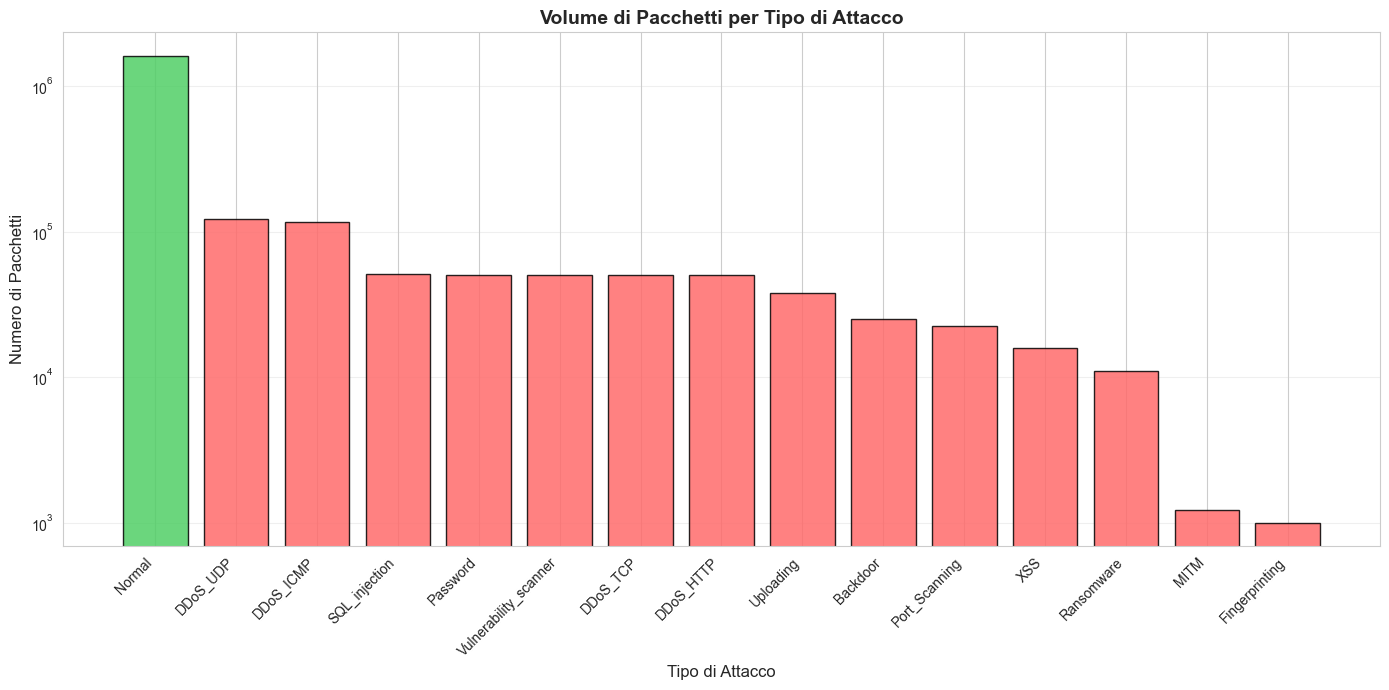

In [69]:
categoria = df['Attack_type'].value_counts().sort_values(ascending=False)
palette = ['#51CF66' if x == 'Normal' else '#FF6B6B' for x in categoria.index]

plt.figure(figsize=(14, 7))
plt.bar(categoria.index, categoria.values, color=palette, edgecolor='black', alpha=0.85)
plt.yscale('log')
plt.xlabel('Tipo di Attacco', fontsize=12)
plt.ylabel('Numero di Pacchetti', fontsize=12)
plt.title('Volume di Pacchetti per Tipo di Attacco', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

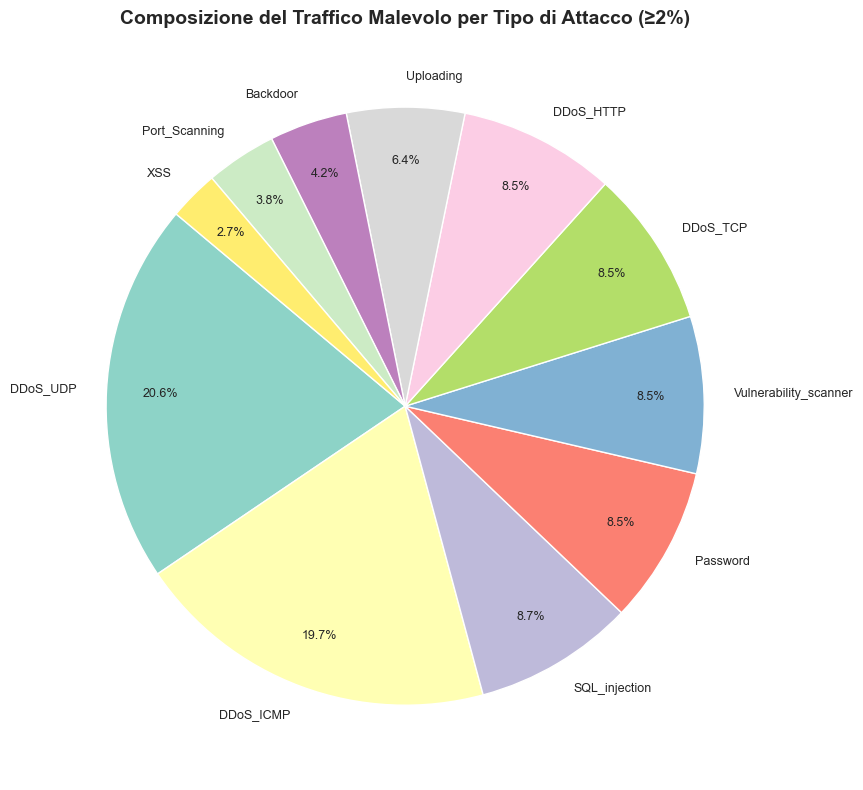

Categorie escluse (<2%): ['Ransomware', 'MITM', 'Fingerprinting']


In [70]:
# Composizione percentuale del traffico malevolo (categorie >= 2%)
attacks_only = df[df['Attack_label'] == 1]['Attack_type'].value_counts()
totale = attacks_only.sum()
attacks_filtered = attacks_only[attacks_only / totale >= 0.02]

plt.figure(figsize=(10, 8))
plt.pie(attacks_filtered.values, labels=attacks_filtered.index, autopct='%1.1f%%',
        startangle=140, colors=plt.cm.Set3(np.linspace(0, 1, len(attacks_filtered))),
        pctdistance=0.82, textprops={'fontsize': 9})
plt.title('Composizione del Traffico Malevolo per Tipo di Attacco (≥2%)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Categorie escluse (<2%): {list(attacks_only[attacks_only / totale < 0.02].index)}")

## 6. Protocolli Utilizzati per Tipo di Attacco

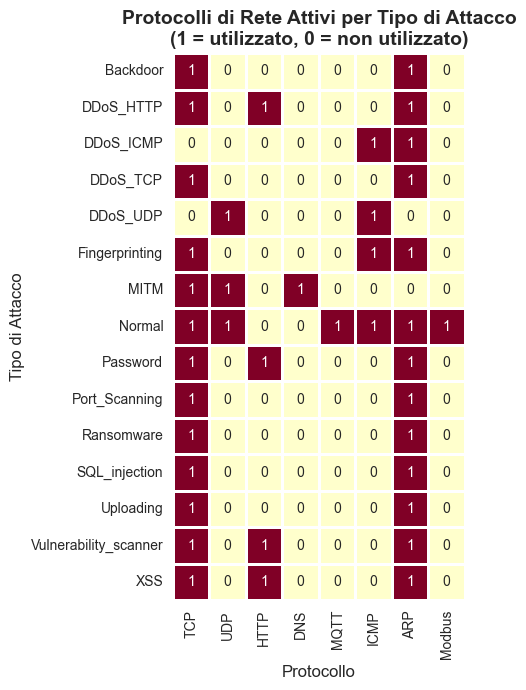

In [ ]:
# Heatmap: protocolli attivi per tipo di attacco
proto_cols = {
    'TCP':    ['tcp.ack', 'tcp.checksum', 'tcp.len'],
    'UDP':    ['udp.port', 'udp.stream', 'udp.time_delta'],
    'HTTP':   ['http.content_length', 'http.request.method'],
    'DNS':    ['dns.qry.name.len', 'dns.qry.type'],
    'MQTT':   ['mqtt.len', 'mqtt.msgtype', 'mqtt.hdrflags'],
    'ICMP':   ['icmp.checksum', 'icmp.seq_le'],
    'ARP':    ['arp.opcode', 'arp.hw.size'],
    'Modbus': ['mbtcp.len', 'mbtcp.trans_id']
}

attack_types = sorted(df['Attack_type'].unique())
proto_matrix = pd.DataFrame(0, index=attack_types, columns=proto_cols.keys())

for at in attack_types:
    sub = df[df['Attack_type'] == at]
    for proto, cols in proto_cols.items():
        valid_cols = [c for c in cols if c in sub.columns]
        totale = sub[valid_cols].apply(pd.to_numeric, errors='coerce').sum().sum()
        if totale > 0:
            proto_matrix.loc[at, proto] = 1

plt.figure(figsize=(12, 7))
sns.heatmap(proto_matrix, annot=True, cmap='YlOrRd', linewidths=1,
            cbar=False, fmt='d', square=True, linecolor='white')
plt.title('Protocolli di Rete Attivi per Tipo di Attacco\n(1 = utilizzato, 0 = non utilizzato)',
          fontsize=14, fontweight='bold')
plt.xlabel('Protocollo', fontsize=12)
plt.ylabel('Tipo di Attacco', fontsize=12)
plt.tight_layout()
plt.show()

## 7. Distribuzione delle Feature Categoriche

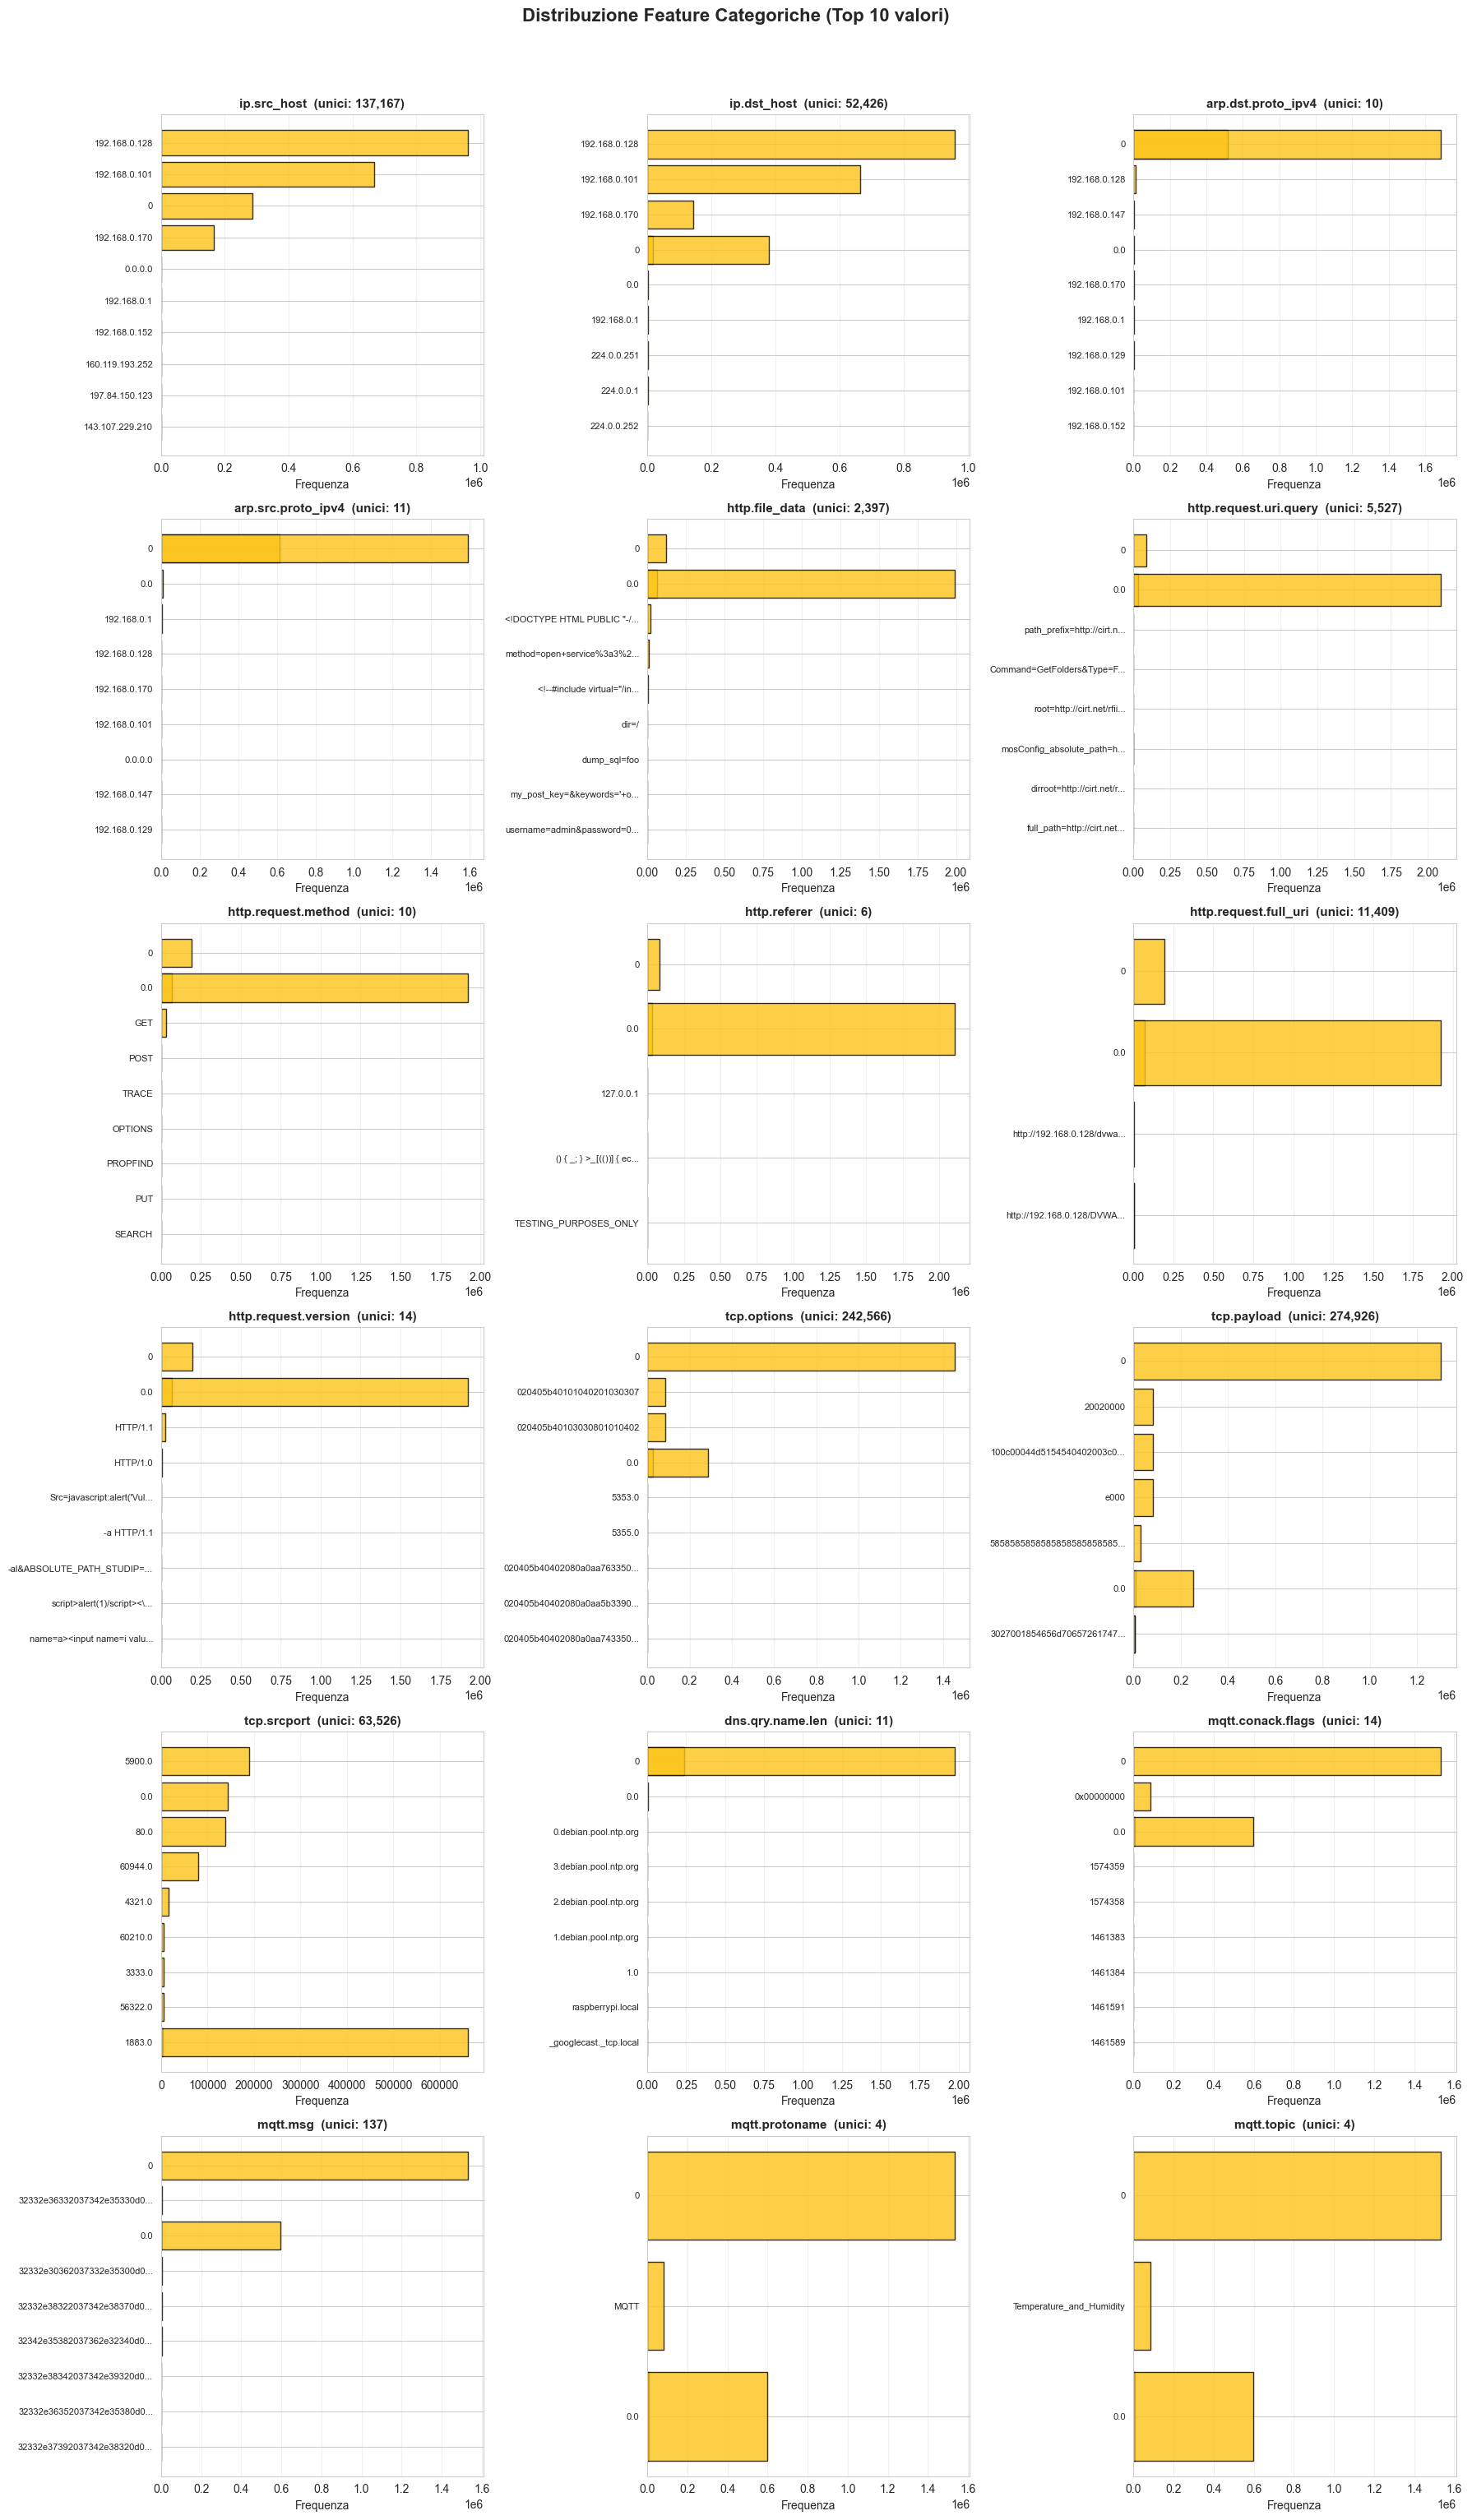

In [ ]:
# Distribuzione feature categoriche
cat_features = [c for c in categorical_cols if c not in ['Attack_type', 'frame.time']]

n_cols = 3
n_rows = (len(cat_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

for i, col in enumerate(cat_features):
    ax = axes[i // n_cols, i % n_cols]
    top_vals = df[col].value_counts().head(10)

    nomi = [str(v)[:25] + '...' if len(str(v)) > 25 else str(v) for v in top_vals.index[::-1]]
    valori = top_vals.values[::-1]

    ax.barh(nomi, valori, color='#FCC419', edgecolor='black', alpha=0.8)
    ax.set_title(f'{col}  (unici: {df[col].nunique():,})', fontsize=11, fontweight='bold')
    ax.set_xlabel('Frequenza')
    ax.grid(axis='x', alpha=0.3)
    ax.tick_params(axis='y', labelsize=8)

for j in range(len(cat_features), n_rows * n_cols):
    axes[j // n_cols, j % n_cols].set_visible(False)

plt.suptitle('Distribuzione Feature Categoriche (Top 10 valori)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 8. Matrice di Correlazione ed Heatmap


Colonne escluse (varianza zero): {'http.tls_port', 'dns.qry.type', 'icmp.unused', 'mqtt.msg_decoded_as'}
Matrice di Correlazione:
                           arp.opcode  arp.hw.size  icmp.checksum  \
arp.opcode                   1.000000     0.944283      -0.009855   
arp.hw.size                  0.944283     1.000000      -0.010436   
icmp.checksum               -0.009855    -0.010436       1.000000   
icmp.seq_le                 -0.010364    -0.010975       0.702156   
icmp.transmit_timestamp     -0.000297    -0.000315       0.020577   
http.content_length         -0.002422    -0.002565      -0.010119   
http.response               -0.005930    -0.006280      -0.024779   
tcp.ack                     -0.006710    -0.007106      -0.028038   
tcp.ack_raw                 -0.057144    -0.060516      -0.238788   
tcp.checksum                -0.068138    -0.072159      -0.284727   
tcp.connection.fin          -0.014979    -0.015862      -0.062591   
tcp.connection.rst          -0.015479    -

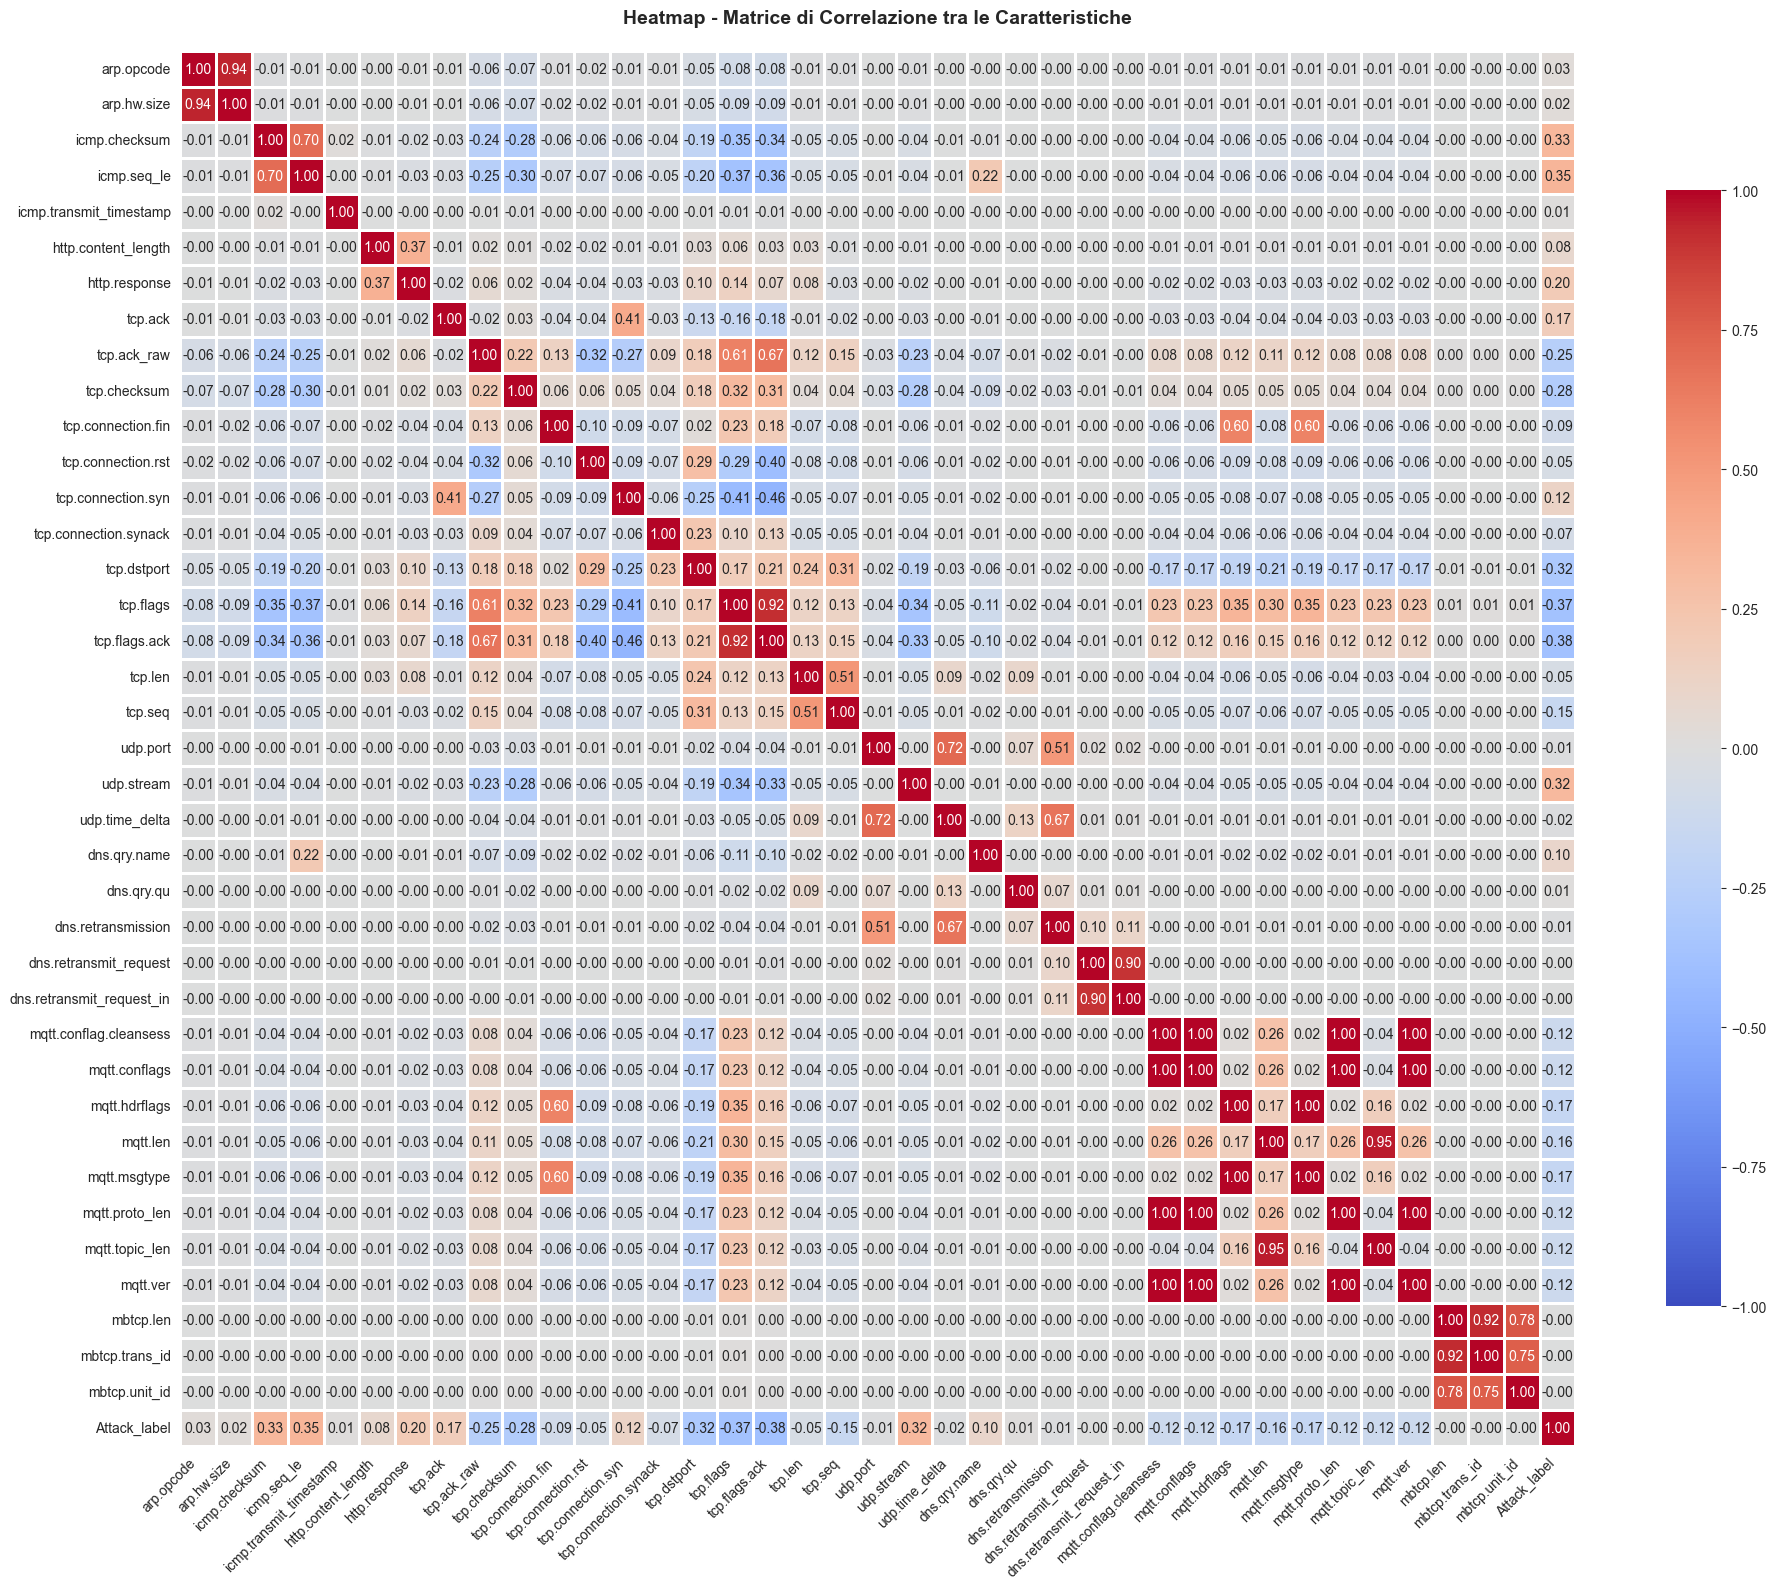

In [ ]:
# Escludi colonne a varianza zero (costanti) che generano NaN nella correlazione
varianza_zero = [c for c in numerical_cols if df[c].nunique() > 1]
correlation_matrix = df[varianza_zero].corr()

print(f"Colonne escluse (varianza zero): {set(numerical_cols) - set(varianza_zero)}")
print("Matrice di Correlazione:")
print(correlation_matrix)

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, center=0)
plt.title('Heatmap - Matrice di Correlazione tra le Caratteristiche', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()